In [ ]:
import json
from matplotlib import pyplot as plt
import numpy as np
from sc3D import SpatialOmicArray

corres_tissues = "data/corresptissues.json"
with open("data/tissuescolor.json") as f:
    colors_paper = json.load(f)
    colors_paper = {eval(k): v for k, v in colors_paper.items()}
%matplotlib inline

# Setting up parameters
Note that it is necessary to download the E8.5.h5ad dataset!

The dataset can be found [there](https://figshare.com/s/9c73df7fd39e3ca5422d).

In [2]:
# Path to the input data
data_path = "data/E8.5.h5ad"
# Path to the output folder
output_folder = "out/"

# Set of genes that will be interpolated
genes_of_interest = ["T", "Sox2"]

# List of tissues that are ignored to do coverslip registration
tissues_to_ignore = [13, 15, 16, 22, 27, 29, 32, 36, 40, 41]

# Coverslips to ignore
# on the starting side
nb_CS_begin_ignore = 0
# on the ending side
nb_CS_end_ignore = 4

# Gives more weight to some tissues to help the alignment
tissue_weight = {21: 2000, 18: 2000}
# xy resolution
xy_resolution = 0.6
# Distance max that two beads can be linked together between coverslips
th_d = 150
# Threshold bellow which the beads will be considered noise.
# Value between 0 (all beads taken) and 1 (almost no beads taken)
outlier_threshold = 0.6

# Number of interpolated layers between two consecutive coverslips
nb_interp = 5

In [ ]:
embryo = SpatialOmicArray(
    data_path,
    tissues_to_ignore,
    corres_tissues,
    tissue_weight=tissue_weight,
    xy_resolution=xy_resolution,
    genes_of_interest=genes_of_interest,
    nb_CS_begin_ignore=nb_CS_begin_ignore,
    nb_CS_end_ignore=nb_CS_end_ignore,
    store_anndata=True,
)
embryo.removing_spatial_outliers(th=outlier_threshold)
embryo.reconstruct_intermediate(embryo, th_d=th_d, genes=genes_of_interest)

## Saving the dataset
The following line allows to save the dataset so you can then open it using our viewer.

In [4]:
embryo.save_anndata(output_folder + "/reconstructed.h5ad")

# Extracting a plan

## Plotting the tissues
### Tissue color

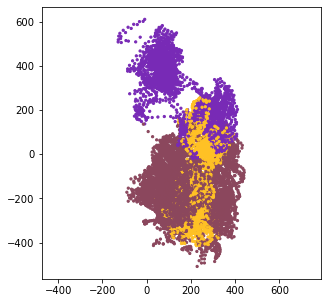

In [5]:
origin = np.mean(
    [
        embryo.final[c]
        for c in embryo.all_cells
        if embryo.tissue[c] in [30, 31]
    ],
    axis=0,
)
origin = np.hstack([origin, 80])
angles = np.array([-5.0, 5.0, 0.0])
points_to_plot = embryo.plot_slice(
    angles,
    color_map=colors_paper,
    origin=origin,
    thickness=30,
    tissues=[18, 30, 31],
    nb_interp=5,
)

### Gene colors

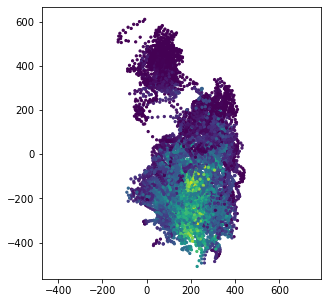

In [6]:
origin = np.mean(
    [
        embryo.final[c]
        for c in embryo.all_cells
        if embryo.tissue[c] in [30, 31]
    ],
    axis=0,
)
origin = np.hstack([origin, 80])
angles = np.array([-5.0, 5.0, 0.0])
points_to_plot = embryo.plot_slice(
    angles,
    colors_paper,
    origin=origin,
    thickness=30,
    gene="T",
    tissues=[18, 30, 31],
    nb_interp=5,
    output_path=output_folder + "test.pdf",
)

### 2 Genes colors

Explanation of the 2 colors parameters:

`gene`: can be a single gene (as above) or a list of TWO genes as below

The color combinations availables are:
- Red and Cyan
- Green and Magenta
- Blue and Yellow

The parameter `main_bi_color` allows to choose one of these 3 combinations. `main_bi_color` can have 3 different values: `r`, `g` or `b` respectively referring to red, green and blue the first color of each color combination.

Moreover, 4 different parameters exists to define the upper and lower bounds of the gene expression values:
- `min_g1`: minimum value for the first gene of the list
- `min_g2`: minimum value for the second gene of the list
- `max_g1`: maximum value for the first gene of the list
- `max_g2`: maximum value for the second gene of the list

By default, if no value is provided (or `None`) these values are computed as the bottom and top 2 percent of the respective gene expression distributions.

To look at the color scale for bi-color plots, one can give the path to the image where the scale will be saved using the parameter `path_scale`. For example `path_scale='path/to/folder/scale.pdf'`


Finally, some parameters can be called to change the properties of the scatter plot, some are called in the example bellow:
- `alpha`: sets the transparency (0 being fully transparent, 1 being fully opaque)
- `linewidth`: width of the line around the markers
- `s`: size of the markers

All the possible parameters for the scatter plot can be found [there](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html#matplotlib.pyplot.scatter).

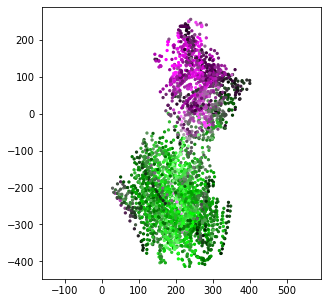

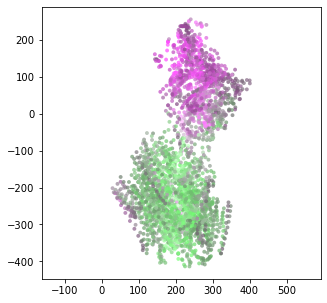

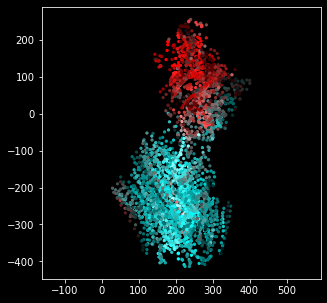

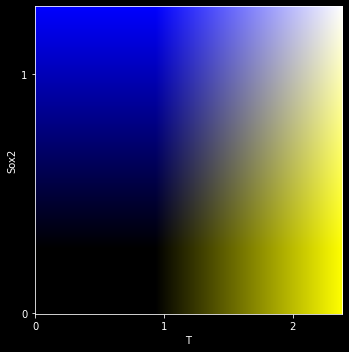

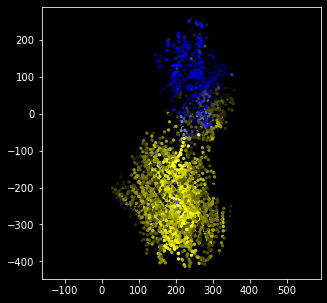

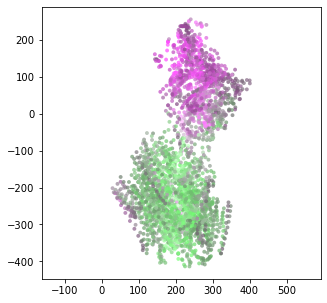

In [7]:
origin = np.mean(
    [
        embryo.final[c]
        for c in embryo.all_cells
        if embryo.tissue[c] in [30, 31]
    ],
    axis=0,
)
origin = np.hstack([origin, 80])
angles = np.array([-5.0, 5.0, 0.0])

# Use the line below before a plot to plot it with dark background
# When using this command line you need to ident the line below
# with plt.style.context('dark_background'):

# Basic plot
points_to_plot = embryo.plot_slice(
    angles,
    colors_paper,
    origin=origin,
    thickness=30,
    gene=["Sox2", "T"],
    tissues=[31],
    nb_interp=5,
)

# Reducing the min and max values to make the plot less dark
# Changing the alpha to .7, the linewidth to 0 and the dot size to 15
points_to_plot = embryo.plot_slice(
    angles,
    colors_paper,
    origin=origin,
    thickness=30,
    gene=["Sox2", "T"],
    tissues=[31],
    nb_interp=5,
    alpha=0.7,
    linewidth=0,
    main_bi_color="g",
    s=15,
    min_g1=-1,
    min_g2=-1,
)

# Example changing the main color to red and using a black background
with plt.style.context("dark_background"):
    points_to_plot = embryo.plot_slice(
        angles,
        colors_paper,
        origin=origin,
        thickness=30,
        gene=["T", "Sox2"],
        tissues=[31],
        nb_interp=5,
        main_bi_color="r",
    )

    # Example with the scale (parameter `path_scale`)
    # together with change of the min_g1 and min_g2 to show the difference
    # Moreover, because the line is still indented (shifted to the right),
    # the dark background is still active
    points_to_plot = embryo.plot_slice(
        angles,
        colors_paper,
        origin=origin,
        thickness=30,
        gene=["T", "Sox2"],
        tissues=[31],
        nb_interp=5,
        main_bi_color="b",
        path_scale=output_folder + "test.pdf",
        min_g1=0.5,
        min_g2=0.5,
    )

# Back to normal indentation => back to white background
points_to_plot = embryo.plot_slice(
    angles,
    colors_paper,
    origin=origin,
    thickness=30,
    gene=["Sox2", "T"],
    tissues=[31],
    nb_interp=5,
    alpha=0.7,
    linewidth=0,
    main_bi_color="g",
    s=15,
    min_g1=-1,
    min_g2=-1,
)

## Saving slice as h5ad

### With interpolated slices but only a subset of genes

In [8]:
origin = np.mean(
    [
        embryo.final[c]
        for c in embryo.all_cells
        if embryo.tissue[c] in [30, 31]
    ],
    axis=0,
)
origin = np.hstack([origin, 80])
angles = np.array([-5.0, 5.0, 0.0])
points_to_plot = embryo.anndata_slice(
    output_folder + "slice.h5ad",
    angles,
    gene_list=genes_of_interest,
    origin=origin,
    tissues=[18, 21, 30, 31, 34],
)

/Users/leo.guignard/miniforge3/envs/test-sc3D2/lib/python3.9/site-packages/sc3D/sc3D.py:1022: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  D = anndata.AnnData(df)
/Users/leo.guignard/miniforge3/envs/test-sc3D2/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


### Without interpolated slices but with all genes

In [9]:
origin = np.mean(
    [
        embryo.final[c]
        for c in embryo.all_cells
        if embryo.tissue[c] in [30, 31]
    ],
    axis=0,
)
origin = np.hstack([origin, 80])
angles = np.array([-5.0, 5.0, 0.0])
embryo.anndata_no_extra(output_folder + "all.h5ad", angles, origin=origin)